In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier

# Charger le jeu de données
df = pd.read_csv('dataset_test4.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']



cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['UrbanRural'] + ['FranchiseBinary']
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary')),
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, n_jobs=-1, max_depth=15, min_child_weight=16))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.05, random_state=42, stratify=y)

# Ajuster la pipeline sur les données d'entraînement
xgboost_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = xgboost_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = xgboost_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)


Nombre de caractéristiques après le prétraitement : 121
0.9470242938509822
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     27435
           1       0.88      0.86      0.87      6977

    accuracy                           0.95     34412
   macro avg       0.92      0.91      0.92     34412
weighted avg       0.95      0.95      0.95     34412



In [15]:
cat_vars, num_vars

(['State',
  'BankState',
  'RevLineCr',
  'LowDoc',
  'UrbanRural',
  'FranchiseBinary'],
 ['Zip', 'NAICS', 'Term', 'NoEmp', 'FranchiseCode'])

In [18]:
new_data = pd.DataFrame({
    'State': ['NH', 'CA', 'NJ'],  
    'BankState': ['NH', 'CA', 'NJ'],  
    'RevLineCr': ['Y', 'N', 'N'],
    'LowDoc': ['Y', 'N', 'N'], 
    'UrbanRural': [0, 1, 0],
    'FranchiseBinary': [0, 1, 0],
    'Zip': [47711, 47711, 0],
    'NAICS': [451120, 451120, 0],
    'Term': [84, 240, 45],
    'NoEmp': [2, 5, 10],
    'FranchiseCode': [0, 1, 0],
})

# faire des prédictions avec le modèle optimisé
new_y_ped = xgboost_pipeline.predict(new_data)

# ajouter les prédictions à new_data
new_data['1->NO  0->YES'] = new_y_ped

print(new_data)

  State BankState RevLineCr LowDoc  UrbanRural  FranchiseBinary    Zip  \
0    NH        NH         Y      Y           0                0  47711   
1    CA        CA         N      N           1                1  47711   
2    NJ        NJ         N      N           0                0      0   

    NAICS  Term  NoEmp  FranchiseCode  1->NO  0->YES  
0  451120    84      2              0              0  
1  451120   240      5              1              0  
2       0    45     10              0              1  


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Charger le jeu de données

df = pd.read_csv('dataset_test1.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']


cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary'] 
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('NewExist')  
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


rf_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy, report)


Nombre de caractéristiques après le prétraitement : 125


/home/utilisateur/Bureau/brief_classif_sba/ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.9355661302626321               precision    recall  f1-score   support

           0       0.94      0.98      0.96    109739
           1       0.90      0.77      0.83     27906

    accuracy                           0.94    137645
   macro avg       0.92      0.87      0.89    137645
weighted avg       0.93      0.94      0.93    137645



In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Charger le jeu de données
df = pd.read_csv('dataset_test1.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']


cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary'] 
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('NewExist')  
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary')),
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(max_depth=12, random_state=42))
])
#XGBClassifier(n_estimators = 100, random_state=42, n_jobs=-1,max_depth=15, min_child_weight=16)
# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.05, random_state=42, stratify=y)

# Ajuster la pipeline sur les données d'entraînement
xgboost_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = xgboost_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = xgboost_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)


Learning rate set to 0.164109
0:	learn: 0.5082439	total: 200ms	remaining: 3m 19s
1:	learn: 0.4010438	total: 398ms	remaining: 3m 18s
2:	learn: 0.3355048	total: 579ms	remaining: 3m 12s
3:	learn: 0.3006738	total: 742ms	remaining: 3m 4s
4:	learn: 0.2757289	total: 932ms	remaining: 3m 5s
5:	learn: 0.2608643	total: 1.11s	remaining: 3m 4s
6:	learn: 0.2399754	total: 1.3s	remaining: 3m 4s
7:	learn: 0.2297037	total: 1.5s	remaining: 3m 5s
8:	learn: 0.2199064	total: 1.71s	remaining: 3m 8s
9:	learn: 0.2139845	total: 1.87s	remaining: 3m 5s
10:	learn: 0.2085230	total: 2.05s	remaining: 3m 4s
11:	learn: 0.2029239	total: 2.24s	remaining: 3m 4s
12:	learn: 0.1986724	total: 2.42s	remaining: 3m 4s
13:	learn: 0.1959291	total: 2.61s	remaining: 3m 3s
14:	learn: 0.1928223	total: 2.79s	remaining: 3m 3s
15:	learn: 0.1901581	total: 2.99s	remaining: 3m 3s
16:	learn: 0.1882055	total: 3.15s	remaining: 3m 2s
17:	learn: 0.1863267	total: 3.33s	remaining: 3m 1s
18:	learn: 0.1823927	total: 3.52s	remaining: 3m 1s
19:	learn:

In [36]:
# Obtenir les importances des caractéristiques du modèle XGBoost
feature_importances = xgboost_pipeline.named_steps['classifier'].feature_importances_

# Obtenir les noms des caractéristiques transformées
feature_names = xgboost_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Créer un DataFrame pour visualiser les importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Afficher les importances des caractéristiques
print(importance_df)

               Feature  Importance
2            num__Term    0.115915
122  cat__UrbanRural_0    0.044928
65   cat__BankState_CA    0.033192
108  cat__BankState_VA    0.032362
88   cat__BankState_MT    0.027576
..                 ...         ...
62   cat__BankState_AN    0.000000
60   cat__BankState_AK    0.000000
109  cat__BankState_VI    0.000000
72   cat__BankState_GU    0.000000
101  cat__BankState_PR    0.000000

[126 rows x 2 columns]


In [37]:
cat_vars, num_vars

(['State',
  'BankState',
  'RevLineCr',
  'LowDoc',
  'NewExist',
  'UrbanRural',
  'FranchiseBinary'],
 ['Zip',
  'NAICS',
  'Term',
  'NoEmp',
  'CreateJob',
  'RetainedJob',
  'FranchiseCode',
  'GrAppv',
  'SBA_Appv'])

In [38]:
new_data = pd.DataFrame({
    'State': ['NH', 'CA', 'NJ'],  
    'BankState': ['NH', 'CA', 'NJ'],  
    'RevLineCr': ['Y', 'N', 'N'],
    'LowDoc': ['Y', 'N', 'N'],
    'NewExist': [1,2,2],  
    'UrbanRural': [0, 1, 0],
    'FranchiseBinary': [0, 1, 0],
    'Zip': [47711, 47711, 0],
    'NAICS': [451120, 451120, 7083],
    'Term': [84, 240, 45],
    'NoEmp': [2, 5, 45],
    'CreateJob': [0,7, 0],
    'RetainedJob': [0, 1, 0],
    'FranchiseCode': [0, 1, 0],
    'GrAppv': [60000.0, 287000.0, 600000.0],
    'SBA_Appv': [32000.0, 215250.0, 499998.0],
})

# faire des prédictions avec le modèle optimisé
new_y_ped = xgboost_pipeline.predict(new_data)

# ajouter les prédictions à new_data
new_data['1->NO  0->YES'] = new_y_ped

print(new_data)

  State BankState RevLineCr LowDoc  NewExist  UrbanRural  FranchiseBinary  \
0    NH        NH         Y      Y         1           0                0   
1    CA        CA         N      N         2           1                1   
2    NJ        NJ         N      N         2           0                0   

     Zip   NAICS  Term  NoEmp  CreateJob  RetainedJob  FranchiseCode  \
0  47711  451120    84      2          0            0              0   
1  47711  451120   240      5          7            1              1   
2      0    7083    45     45          0            0              0   

     GrAppv  SBA_Appv  1->NO  0->YES  
0   60000.0   32000.0              0  
1  287000.0  215250.0              0  
2  600000.0  499998.0              1  


In [39]:
from sklearn.model_selection import cross_val_predict

y_train_pred_xgb = cross_val_predict(xgboost_pipeline, X_train, y_train)

/home/utilisateur/Bureau/brief_classif_sba/ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/utilisateur/Bureau/brief_classif_sba/ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[506203,  15053],
       [ 17928, 114625]])

,Predicted PIF (0),Predicted CHGOFF (1)
Actual PIF (0),506203,15053
Actual CHGOFF (1),17928,114625


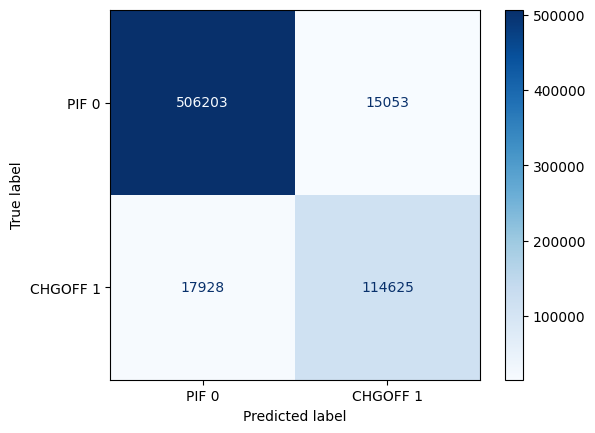

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# On crée la matrice de confusion en passant les classes et les prédictions du modèle, puis on l'affiche
cm = confusion_matrix(y_train, y_train_pred_xgb)
display(cm)

# Affichage avec un DataFrame
conf_matrix = pd.DataFrame(cm, index=["Actual PIF (0)", "Actual CHGOFF (1)"], columns=["Predicted PIF (0)", "Predicted CHGOFF (1)"])
display(conf_matrix)

# Affichage avec un plot
graph_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["PIF 0", "CHGOFF 1"])
graph_cm.plot(cmap="Blues")

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    521256
           1       0.88      0.86      0.87    132553

    accuracy                           0.95    653809
   macro avg       0.92      0.92      0.92    653809
weighted avg       0.95      0.95      0.95    653809



In [42]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
# Au lieu d'obtenir les prédictions, on récupere les scores de probabilités pour chaque observations
y_probas_xgb = cross_val_predict(xgboost_pipeline, X_train, y_train, method="predict_proba")
display(y_probas_xgb)

# On récupere uniquement les probabilités pour la classe positive
y_scores_xgb = y_probas_xgb[:, 1]

# A partir des probabilités on calcule les combinaisons de scores pour recall et precision en fonction du seuil
precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(y_train, y_scores_xgb)

/home/utilisateur/Bureau/brief_classif_sba/ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/utilisateur/Bureau/brief_classif_sba/ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.70977926, 0.2902207 ],
       [0.01020157, 0.9897984 ],
       [0.99247783, 0.00752216],
       ...,
       [0.9936825 , 0.00631749],
       [0.996391  , 0.00360901],
       [0.9940979 , 0.00590214]], dtype=float32)

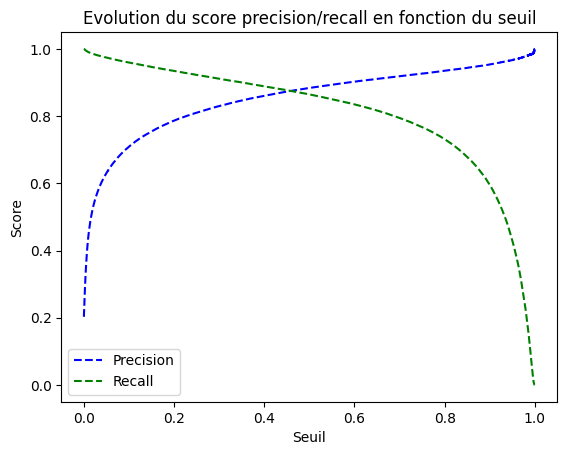

In [43]:
import matplotlib.pyplot as plt

plt.plot(thresholds_xgb, precisions_xgb[:-1], "b--", label="Precision")
plt.plot(thresholds_xgb, recalls_xgb[:-1], "g--", label="Recall")
plt.title("Evolution du score precision/recall en fonction du seuil")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import roc_curve

# La fonction roc_curve retourne le FPR, TPR et les seuils 
fpr_xgb, tpr_xgb, tresholds_xgb = roc_curve(y_train, y_scores_xgb)

In [45]:
# Fonction pour représenter la courbe ROC
def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("Courbe ROC")
    plt.xlabel("Taux de Faux Positif")
    plt.ylabel("Taux de Vrai Positif")
    plt.grid()

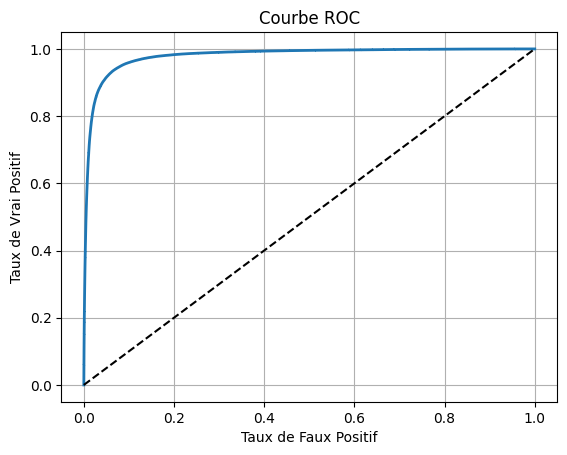

In [46]:
plot_roc_curve(fpr_xgb, tpr_xgb)
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score

display(roc_auc_score(y_train, y_scores_xgb))

0.9795523055432922

/home/utilisateur/Bureau/brief_classif_sba/ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/utilisateur/Bureau/brief_classif_sba/ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


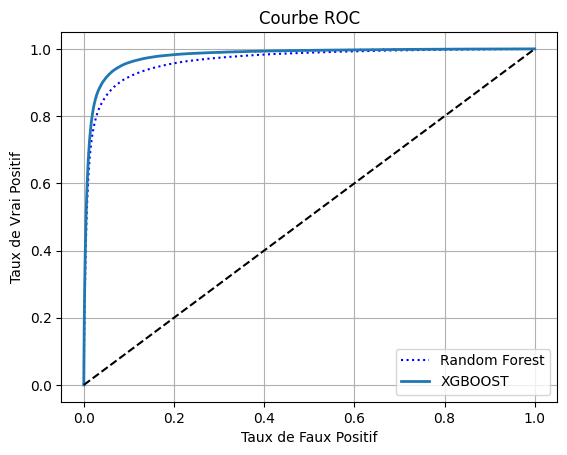

AUC modèle XGBOOST 0.9795523055432922
AUC modèle Random Forest 0.9654743365963918


In [50]:
# On récupere les scores pour le modèle random forest
y_probas_rf = cross_val_predict(rf_pipeline, X_train, y_train, method="predict_proba")
y_scores_rf = y_probas_rf[:, 1]

# On calcule le TPR et FPR pour le modèle random forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf)

# On représente graphiquement les deux modèles
plt.plot(fpr_rf, tpr_rf, "b:", label="Random Forest")
plot_roc_curve(fpr_xgb, tpr_xgb, "XGBOOST")
plt.legend(loc="lower right")
plt.show()

print("AUC modèle XGBOOST", roc_auc_score(y_train, y_scores_xgb))
print("AUC modèle Random Forest", roc_auc_score(y_train, y_scores_rf))

In [56]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = xgboost_pipeline,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'f1_macro'
)

#recuperation des moyennes et des écarts types(facultatif) à chaque cv
train_scores_mean = train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)


plt.figure()
plt.title("Learning Curve (XGBOOST)")
plt.xlabel("Training examples")
plt.ylabel("f1 macro")
#plt.gca().invert_yaxis() #inverser y car métrique de perte

# afficher les points
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

# relier les points
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")


plt.legend()
plt.show()

/home/utilisateur/Bureau/brief_classif_sba/ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


KeyboardInterrupt: 